In [1]:
from pprint import pprint
import numpy as np
import csv
import matplotlib.pyplot as plt
import random
import pandas as pd

data_path = "./resources/winequality-red.csv"
# %matplotlib inline
# %config InlineBackend.figure_format='svg'

In [2]:
def plot_scatter_matrix(wine_data, good_treshold, bad_trashold, save_plot=False):
    count_of_props = len(wine_data[0]) - 1
    fig, axes = plt.subplots(count_of_props, count_of_props, figsize=(15, 10))
    fig.subplots_adjust(hspace=0, wspace=0)
    prop_names = wine_data[0][:-1]
    i = 0
    for ax in axes:
        ax[i].text(0.5, 0.5, prop_names[i].replace(' ', '\n'), ha='center', va='center')
        for a in ax:
            a.set_xticklabels([])
            a.set_yticklabels([])
            a.tick_params(axis='both', width=0)
        i += 1
    columns = []
    for column in range(len(wine_data[0])):
        columns.append([el[column] for el in wine_data])
    columns2 = []
    for column in columns:
        columns2.append([float(el) for el in column[1:]])
    columns = columns2
    column_height = len(columns[0])
    for i in range(count_of_props):
        for j in range(count_of_props):
            if i == j:
                continue
            good_x = []
            good_y = []
            bad_x = []
            bad_y = []
            for k in range(column_height):
                if columns[-1][k] > good_treshold:
                    good_x.append(columns[j][k])
                    good_y.append(columns[i][k])
                if columns[-1][k] < bad_trashold:
                    bad_x.append(columns[j][k])
                    bad_y.append(columns[i][k])
            dots1 = axes[i][j].plot(good_x, good_y, 'go')
            dots1[0].set_markersize(0.5)
            dots2 = axes[i][j].plot(bad_x, bad_y, 'ro')
            dots2[0].set_markersize(0.5)
    if save_plot:
        plt.savefig("./scatter_plot.png")
    plt.show(fig)

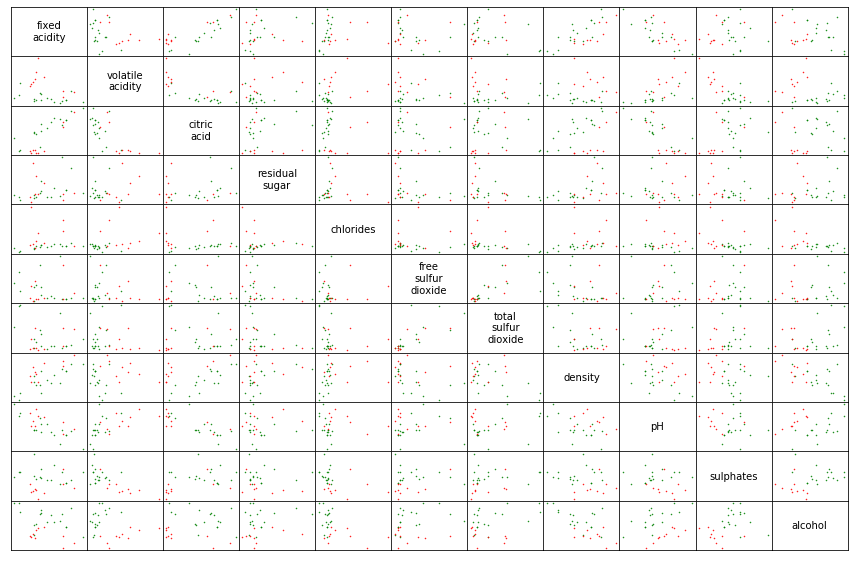

In [3]:
reader = csv.reader(open(data_path, mode='r'), delimiter=";")
data = [el for el in reader]
plot_scatter_matrix(data, 7, 4)

I prefer to take density and citric acid for perceptron training

# V.2 Learning to perceptron

In [4]:
def ft_dot(a, b):
    if len(a) != len(b):
        raise ValueError
    return sum([ai * bi for ai, bi in zip(a, b)])


class Perceptron():

    def __init__(self, lr=0.0001):
        self.lr = lr
        self.performance = []
        self.W = []
        self.bias = None

    def _heaviside(self, arg):
        return 1 if arg >= 0 else 0
    
    def _train_epoch(self, X, y):
        errors_num = 0
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(self.W, xi) + self.bias
            if self._heaviside(res) != yi:
                errors_num += 1
                self.bias = self.bias + self.lr * (yi - self._heaviside(res))
                Wnew = []
                for w, xi_j in zip(self.W, xi):
                    wnew = w + self.lr * (yi - self._heaviside(res)) * xi_j
                    Wnew.append(wnew)
                self.W = Wnew
        return errors_num

    def train(self, X, y, epoches=0):
        self.W = [random.uniform(-1, 1) for i in range(X.shape[1])]                                                       
        self.bias = random.uniform(-1, 1)
        epoch_num = 0
        while True:
            epoch_erro_num = self._train_epoch(X, y)
            epoch_num += 1
            self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
            if epoches == epoch_num:
                break
            if epoch_erro_num == 0:
                break
        return self.performance

In [5]:
df = pd.read_csv(data_path, sep=';')
selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)

In [6]:
X = selected_data[['density', 'citric acid']]
y = selected_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
perc = Perceptron(lr=0.005)
performance = perc.train(X, y)
for el in performance:
    print('epoch num -  {} errors - {}'.format(el[0], el[1]))

epoch num -  1 errors - 10
epoch num -  2 errors - 10
epoch num -  3 errors - 10
epoch num -  4 errors - 10
epoch num -  5 errors - 10
epoch num -  6 errors - 10
epoch num -  7 errors - 10
epoch num -  8 errors - 10
epoch num -  9 errors - 8
epoch num -  10 errors - 6
epoch num -  11 errors - 8
epoch num -  12 errors - 8
epoch num -  13 errors - 8
epoch num -  14 errors - 8
epoch num -  15 errors - 8
epoch num -  16 errors - 8
epoch num -  17 errors - 8
epoch num -  18 errors - 7
epoch num -  19 errors - 6
epoch num -  20 errors - 8
epoch num -  21 errors - 8
epoch num -  22 errors - 8
epoch num -  23 errors - 8
epoch num -  24 errors - 8
epoch num -  25 errors - 10
epoch num -  26 errors - 11
epoch num -  27 errors - 10
epoch num -  28 errors - 10
epoch num -  29 errors - 10
epoch num -  30 errors - 10
epoch num -  31 errors - 12
epoch num -  32 errors - 10
epoch num -  33 errors - 12
epoch num -  34 errors - 10
epoch num -  35 errors - 10
epoch num -  36 errors - 12
epoch num -  37 e

epoch num -  2908 errors - 12
epoch num -  2909 errors - 10
epoch num -  2910 errors - 10
epoch num -  2911 errors - 10
epoch num -  2912 errors - 10
epoch num -  2913 errors - 12
epoch num -  2914 errors - 10
epoch num -  2915 errors - 10
epoch num -  2916 errors - 12
epoch num -  2917 errors - 10
epoch num -  2918 errors - 10
epoch num -  2919 errors - 12
epoch num -  2920 errors - 10
epoch num -  2921 errors - 10
epoch num -  2922 errors - 10
epoch num -  2923 errors - 10
epoch num -  2924 errors - 12
epoch num -  2925 errors - 10
epoch num -  2926 errors - 10
epoch num -  2927 errors - 12
epoch num -  2928 errors - 10
epoch num -  2929 errors - 10
epoch num -  2930 errors - 10
epoch num -  2931 errors - 10
epoch num -  2932 errors - 12
epoch num -  2933 errors - 10
epoch num -  2934 errors - 10
epoch num -  2935 errors - 12
epoch num -  2936 errors - 10
epoch num -  2937 errors - 10
epoch num -  2938 errors - 10
epoch num -  2939 errors - 10
epoch num -  2940 errors - 12
epoch num 

epoch num -  5582 errors - 10
epoch num -  5583 errors - 10
epoch num -  5584 errors - 11
epoch num -  5585 errors - 11
epoch num -  5586 errors - 10
epoch num -  5587 errors - 10
epoch num -  5588 errors - 10
epoch num -  5589 errors - 11
epoch num -  5590 errors - 12
epoch num -  5591 errors - 10
epoch num -  5592 errors - 10
epoch num -  5593 errors - 10
epoch num -  5594 errors - 10
epoch num -  5595 errors - 10
epoch num -  5596 errors - 10
epoch num -  5597 errors - 10
epoch num -  5598 errors - 10
epoch num -  5599 errors - 10
epoch num -  5600 errors - 10
epoch num -  5601 errors - 10
epoch num -  5602 errors - 10
epoch num -  5603 errors - 10
epoch num -  5604 errors - 10
epoch num -  5605 errors - 10
epoch num -  5606 errors - 10
epoch num -  5607 errors - 10
epoch num -  5608 errors - 10
epoch num -  5609 errors - 10
epoch num -  5610 errors - 10
epoch num -  5611 errors - 10
epoch num -  5612 errors - 10
epoch num -  5613 errors - 10
epoch num -  5614 errors - 10
epoch num 

epoch num -  7668 errors - 8
epoch num -  7669 errors - 8
epoch num -  7670 errors - 6
epoch num -  7671 errors - 6
epoch num -  7672 errors - 6
epoch num -  7673 errors - 8
epoch num -  7674 errors - 8
epoch num -  7675 errors - 8
epoch num -  7676 errors - 8
epoch num -  7677 errors - 12
epoch num -  7678 errors - 10
epoch num -  7679 errors - 12
epoch num -  7680 errors - 12
epoch num -  7681 errors - 12
epoch num -  7682 errors - 10
epoch num -  7683 errors - 10
epoch num -  7684 errors - 12
epoch num -  7685 errors - 10
epoch num -  7686 errors - 10
epoch num -  7687 errors - 12
epoch num -  7688 errors - 10
epoch num -  7689 errors - 11
epoch num -  7690 errors - 10
epoch num -  7691 errors - 9
epoch num -  7692 errors - 11
epoch num -  7693 errors - 10
epoch num -  7694 errors - 10
epoch num -  7695 errors - 10
epoch num -  7696 errors - 10
epoch num -  7697 errors - 10
epoch num -  7698 errors - 10
epoch num -  7699 errors - 10
epoch num -  7700 errors - 10
epoch num -  7701 er

epoch num -  10720 errors - 10
epoch num -  10721 errors - 10
epoch num -  10722 errors - 10
epoch num -  10723 errors - 10
epoch num -  10724 errors - 10
epoch num -  10725 errors - 10
epoch num -  10726 errors - 10
epoch num -  10727 errors - 10
epoch num -  10728 errors - 10
epoch num -  10729 errors - 10
epoch num -  10730 errors - 10
epoch num -  10731 errors - 10
epoch num -  10732 errors - 10
epoch num -  10733 errors - 10
epoch num -  10734 errors - 10
epoch num -  10735 errors - 10
epoch num -  10736 errors - 10
epoch num -  10737 errors - 10
epoch num -  10738 errors - 10
epoch num -  10739 errors - 10
epoch num -  10740 errors - 10
epoch num -  10741 errors - 10
epoch num -  10742 errors - 10
epoch num -  10743 errors - 10
epoch num -  10744 errors - 10
epoch num -  10745 errors - 10
epoch num -  10746 errors - 10
epoch num -  10747 errors - 10
epoch num -  10748 errors - 10
epoch num -  10749 errors - 10
epoch num -  10750 errors - 10
epoch num -  10751 errors - 10
epoch nu

epoch num -  13565 errors - 10
epoch num -  13566 errors - 10
epoch num -  13567 errors - 10
epoch num -  13568 errors - 10
epoch num -  13569 errors - 10
epoch num -  13570 errors - 10
epoch num -  13571 errors - 10
epoch num -  13572 errors - 10
epoch num -  13573 errors - 10
epoch num -  13574 errors - 10
epoch num -  13575 errors - 8
epoch num -  13576 errors - 10
epoch num -  13577 errors - 8
epoch num -  13578 errors - 8
epoch num -  13579 errors - 8
epoch num -  13580 errors - 8
epoch num -  13581 errors - 8
epoch num -  13582 errors - 8
epoch num -  13583 errors - 8
epoch num -  13584 errors - 6
epoch num -  13585 errors - 6
epoch num -  13586 errors - 4
epoch num -  13587 errors - 6
epoch num -  13588 errors - 6
epoch num -  13589 errors - 6
epoch num -  13590 errors - 6
epoch num -  13591 errors - 6
epoch num -  13592 errors - 6
epoch num -  13593 errors - 6
epoch num -  13594 errors - 6
epoch num -  13595 errors - 6
epoch num -  13596 errors - 6
epoch num -  13597 errors - 8

epoch num -  16528 errors - 10
epoch num -  16529 errors - 10
epoch num -  16530 errors - 10
epoch num -  16531 errors - 10
epoch num -  16532 errors - 10
epoch num -  16533 errors - 10
epoch num -  16534 errors - 10
epoch num -  16535 errors - 10
epoch num -  16536 errors - 10
epoch num -  16537 errors - 10
epoch num -  16538 errors - 10
epoch num -  16539 errors - 10
epoch num -  16540 errors - 10
epoch num -  16541 errors - 10
epoch num -  16542 errors - 10
epoch num -  16543 errors - 10
epoch num -  16544 errors - 10
epoch num -  16545 errors - 10
epoch num -  16546 errors - 10
epoch num -  16547 errors - 10
epoch num -  16548 errors - 10
epoch num -  16549 errors - 10
epoch num -  16550 errors - 10
epoch num -  16551 errors - 10
epoch num -  16552 errors - 10
epoch num -  16553 errors - 10
epoch num -  16554 errors - 10
epoch num -  16555 errors - 10
epoch num -  16556 errors - 10
epoch num -  16557 errors - 10
epoch num -  16558 errors - 10
epoch num -  16559 errors - 10
epoch nu

epoch num -  19800 errors - 12
epoch num -  19801 errors - 8
epoch num -  19802 errors - 8
epoch num -  19803 errors - 10
epoch num -  19804 errors - 12
epoch num -  19805 errors - 8
epoch num -  19806 errors - 8
epoch num -  19807 errors - 8
epoch num -  19808 errors - 10
epoch num -  19809 errors - 8
epoch num -  19810 errors - 8
epoch num -  19811 errors - 9
epoch num -  19812 errors - 11
epoch num -  19813 errors - 8
epoch num -  19814 errors - 9
epoch num -  19815 errors - 11
epoch num -  19816 errors - 9
epoch num -  19817 errors - 10
epoch num -  19818 errors - 11
epoch num -  19819 errors - 9
epoch num -  19820 errors - 10
epoch num -  19821 errors - 11
epoch num -  19822 errors - 10
epoch num -  19823 errors - 10
epoch num -  19824 errors - 10
epoch num -  19825 errors - 10
epoch num -  19826 errors - 9
epoch num -  19827 errors - 11
epoch num -  19828 errors - 10
epoch num -  19829 errors - 10
epoch num -  19830 errors - 10
epoch num -  19831 errors - 10
epoch num -  19832 er

In [7]:
def plot_performance(performance, data, good_thresh, bad_thresh, epoch=-1, save_plot=False, show=True):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    if epoch > len(performance):
        raise Exception('too large epoch num passed')
    if epoch > 0:
        errors = [el[1] for el, feature in zip(performance, range(epoch))]
        epoches = [el[0] for el, feature in zip(performance, range(epoch))]
    else:
        errors = [el[1] for el in performance]
        epoches = [el[0] for el in performance]
    axes[0].plot(epoches, errors)
    if epoch > 0:
        W = performance[epoch][2]
        bias = performance[epoch][3]
    else:
        W = performance[-1][2]
        bias = performance[-1][3]
    w = -(W[0] / W[1])
    b = -bias/W[1]
    x = [x for x in np.arange(-15, 15, .01)]
    y = [(w * xi + b) for xi in x]
    axes[1].plot(x, y, 'b--', linewidth='1', label='Decision boundary')
    axes[1].set_xlabel('density')
    axes[1].set_ylabel('citric acid')
    if epoch > 0:
        epoch_last = epoch
    else:
        epoch_last = performance[-1][0]
    axes[1].set_title('Decision boundary on epoch: ' + str(epoch_last))
    good_x, good_y, bad_x, bad_y = [], [], [], []
    for line in data.values:
        if line[-1] >= good_thresh or line[-1] <= bad_thresh:
            if line[-1] >= good_thresh:
                good_x.append(line[0])
                good_y.append(line[1])
            if line[-1] <= bad_thresh:
                bad_x.append(line[0])
                bad_y.append(line[1])
    dots1 = axes[1].plot(good_x, good_y, 'go', label='good wines(>=' + str(good_thresh) + ' score)')
    dots2 = axes[1].plot(bad_x, bad_y, 'ro', label='bad wines(<=' + str(bad_thresh) + ' score)')
    good_x.extend(bad_x)
    good_y.extend(bad_y)
    min_x_axes = min(good_x) - 0.01
    max_x_axes = max(good_x) + 0.01
    min_y_axes = min(good_y) - 0.01
    max_y_axes = max(good_y) + 0.01
    axes[1].set_xlim([min_x_axes, max_x_axes])
    axes[1].set_ylim([min_y_axes, max_y_axes])
    dots1[0].set_markersize(1.5)
    dots2[0].set_markersize(1.5)
    y_just_values = [yi[0] for yi in y]
    axes[1].fill_between(x, y_just_values, min_y_axes, color='#D89797')
    axes[1].fill_between(x, y_just_values, max_y_axes, color='#B8F4C0')
    box = axes[1].get_position()
    axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if show:
        plt.show(fig)
    if save_plot:
        fig.savefig("./decision_boundary.png")
    return fig

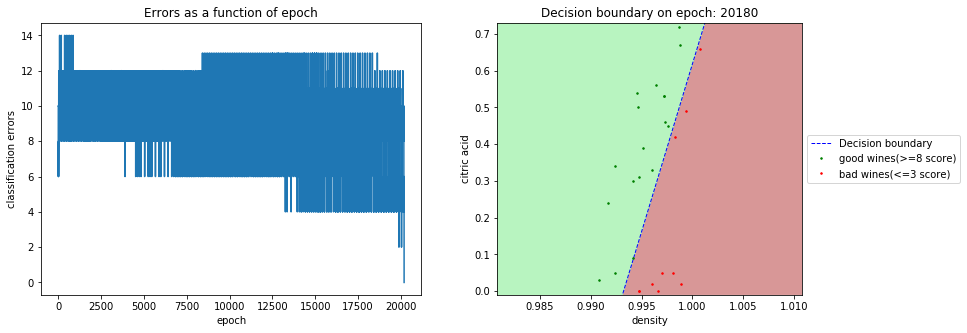

In [8]:
fig = plot_performance(performance, selected_data, 8, 3)

## Feature scaling
 if we scale our data,the training process will be much faster

In [9]:
def normalize_data(column, mod='mean'):
    if mod == 'mean':
        return (column - column.mean()) / (column.max() - column.min())
    elif mod == 'minmax':
        return (column - column.min()) / (column.max() - column.min())
    elif mod == 'standart':
        return(column - column.mean()) / (column.std())
    else:
        raise ValueError('Doesnt correct mod type.')

In [10]:
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
print(norm_data)

     density  citric acid  quality
0   0.128357     0.204861        8
1   0.158357     0.190972        8
2  -0.361643    -0.364583        8
3   0.268357     0.565972        8
4   0.278357     0.496528        8
5   0.478357     0.482639        3
6   0.038357     0.343750        8
7   0.118357     0.302083        8
8   0.118357     0.302083        8
9   0.338357     0.246528        3
10 -0.431643    -0.100694        8
11  0.058357    -0.434028        3
12 -0.184643    -0.309028        8
13  0.230357     0.149306        3
14  0.290357    -0.406250        3
15 -0.139643     0.260417        8
16 -0.150643     0.315972        8
17 -0.366643     0.038194        8
18 -0.085643     0.107639        8
19 -0.521643    -0.392361        8
20 -0.125643    -0.434028        3
21 -0.130643    -0.434028        3
22 -0.001643     0.024306        8
23 -0.129643    -0.003472        8
24  0.103357    -0.364583        3
25  0.206357    -0.364583        3
26 -0.001643    -0.406250        3
27 -0.182643    -0.0

In [11]:
X_norm = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
perc = Perceptron(lr=0.005)
performance = perc.train(X_norm, y, epoches=-1)
for el in performance:
    print('epoch num -  {} errors - {}'.format(el[0], el[1]))

epoch num -  1 errors - 7
epoch num -  2 errors - 9
epoch num -  3 errors - 8
epoch num -  4 errors - 7
epoch num -  5 errors - 7
epoch num -  6 errors - 7
epoch num -  7 errors - 7
epoch num -  8 errors - 6
epoch num -  9 errors - 7
epoch num -  10 errors - 7
epoch num -  11 errors - 6
epoch num -  12 errors - 6
epoch num -  13 errors - 6
epoch num -  14 errors - 5
epoch num -  15 errors - 6
epoch num -  16 errors - 5
epoch num -  17 errors - 5
epoch num -  18 errors - 5
epoch num -  19 errors - 3
epoch num -  20 errors - 3
epoch num -  21 errors - 4
epoch num -  22 errors - 3
epoch num -  23 errors - 4
epoch num -  24 errors - 3
epoch num -  25 errors - 4
epoch num -  26 errors - 4
epoch num -  27 errors - 3
epoch num -  28 errors - 4
epoch num -  29 errors - 3
epoch num -  30 errors - 3
epoch num -  31 errors - 3
epoch num -  32 errors - 4
epoch num -  33 errors - 3
epoch num -  34 errors - 3
epoch num -  35 errors - 3
epoch num -  36 errors - 2
epoch num -  37 errors - 2
epoch num 

In [12]:
%%timeit
perc.train(X_norm, y)

22.1 ms ± 649 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
import matplotlib.animation as animation

# V.3 My fair ADALINE

Encouraged by the results of your perceptron, you decide to see if you can use it to
distinguish between wines with a score of 4 and lower, and wines with a score
of 7 and higher. Feeling confident, you decide to let the perceptron train until it can
find the best decision boundary.

In [14]:
class Adaline:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.W = []
        self.performance = []
        self.errors_batch = []
        self.bias = None

    def _sigmoid(self, arg):
        return 1 / (1 + np.exp(-arg))

    def _activ_func(self, arg):
        return 1 if self._sigmoid(arg) >= 0.5 else 0

    def _train_epoch_online(self, X, y):
        errors_num = 0
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(xi, self.W) + self.bias
            if self._activ_func(res) != yi:
                errors_num += 1
                self.bias = self.bias + self.lr * (yi - self._activ_func(res))
                Wnew = []
                for xi_j, w in zip(xi, self.W):
                    wnew = w + self.lr * (yi - self._activ_func(res)) * xi_j
                    Wnew.append(wnew)
                self.W = Wnew
        return errors_num

    def _train_epoch_batch(self, X, y):
        errors_num = 1
        erros_batch = []
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(xi, self.W) + self.bias
            if self._activ_func(res) != yi:
                errors_num += 1
                erros_batch.append([xi, yi])
        self.errors_batch.append(erros_batch)

        for xi, yi in erros_batch:
            res = ft_dot(xi, self.W) + self.bias
            self.bias = self.bias + self.lr * (yi - self._activ_func(res))
            Wnew = []
            for xi_j, w in zip(xi, self.W):
                wnew = w + self.lr * (yi - self._activ_func(res)) * xi_j
                Wnew.append(wnew)
            self.W = Wnew
        return errors_num

    def train(self, X, y, epoches=-1, mod='online'):
        self.W = [random.uniform(-1, 1) for i in range(X.shape[1])] 
        self.bias = random.uniform(-1, 1)
        epoch_num = 0
        if mod == 'online':
            while True:
                epoch_erro_num = self._train_epoch_online(X, y)
                epoch_num += 1
                self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
#                 pprint((epoch_num, epoch_erro_num, self.W, self.bias))
                if epoches == epoch_num and epoches > 0:
                    break
                if epoch_erro_num == 0:
                    break
            return self.performance
        elif mod == 'batch':
            while True:
                epoch_erro_num = self._train_epoch_batch(X, y)
                epoch_num += 1
                self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
#                 pprint((epoch_num, epoch_erro_num, self.W, self.bias))
                if epoches == epoch_num and epoches > 0:
                    break
                if epoch_erro_num == 0:
                    break
            return self.performance
        else:
            raise ValueError('Mod isnt correct')

    def predict(self, X):
        predicted_values = []
        for xi in X.values:
            res = ft_dot(xi, self.W) + self.bias
            predicted_values.append(self._activ_func(res))
        return predicted_values

In [15]:
selected_data = df[(df['quality'] >= 7) | (df['quality'] <= 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X_norm = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] <= 4] = 0
y.loc[y['quality'] >= 7] = 1
adaline = Adaline(lr=0.005)
performance = adaline.train(X_norm, y, mod='batch', epoches=500)
print(performance[-1])

(500, 64, [array([-0.00577792]), array([0.00304662])], array([-0.00663762]))


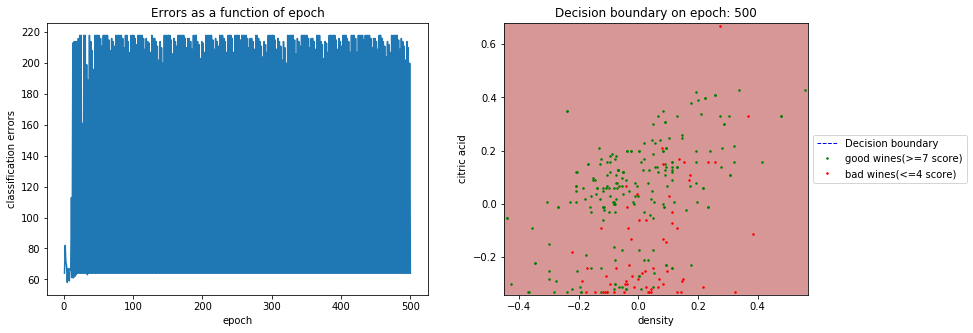

In [16]:
fig = plot_performance(performance, norm_data, 7, 4)

## V.4 Advanced wine sampling and resampling

a) Holdout method to partition and checking accuracy with this method

In [17]:
def holdout_part(df, parts_num=5):
    if parts_num <= 0:
        raise ValueError('Doesnt correct parts num.')
    rows_num = len(df)
    slice_len = rows_num // parts_num
    train_df = df[:rows_num - slice_len]
    valid_df = df[rows_num - slice_len:]
    return train_df, valid_df

In [18]:
train_df, valid_df = holdout_part(selected_data)
X_train = train_df[['density', 'citric acid']]
y_train = train_df.loc[:, ['quality']]
y_train.loc[y['quality'] <= 4] = 0
y_train.loc[y['quality'] >= 7] = 1
epoches = 500
adaline = Adaline(lr=0.005)
performance = adaline.train(X, y, epoches=epoches)
X_valid = valid_df[['density', 'citric acid']]
y_valid = valid_df.loc[:, ['quality']]
y_valid.loc[y['quality'] <= 4] = 0
y_valid.loc[y['quality'] >= 7] = 1
pred_vals = adaline.predict(X_valid)
pred_errors = 0
for y_true, y_pred in zip(y_valid.values, pred_vals):
    if y_true == y_pred:
        pred_errors += 1
accuracy = 1 - (pred_errors / len(y_valid))
print('Accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy * 100))

Accuracy of prediction after 500 train epoches - 67.85714285714286%


b)  K-fold cross-validation method of partition and checking accuracy with this method

In [19]:
def k_fold_part(df, parts_num=5, valid_fold_num=1, shuffle=False):
    if parts_num <= 0 or valid_fold_num <= 0 or valid_fold_num > parts_num:
        raise ValueError('Doesnt correct parts num or valid fold num.')
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)
    res = df
    rows_num = len(res)
    slice_len = rows_num // parts_num
    start = slice_len * (valid_fold_num - 1)
    end = start + slice_len
    valid_df = res.loc[start:end-1, :]
    before_start = res.loc[:start-1, :]
    after_end = res.loc[end:, :]
    train_df = before_start.append(after_end)
    return train_df, valid_df

In [20]:
folds = 5
error_nums = []
for train_try in range(1, folds + 1):
    train_set, valid_set = k_fold_part(selected_data, valid_fold_num=train_try, parts_num=folds, shuffle=True)
    X_train = train_df[['density', 'citric acid']]
    y_train = train_df.loc[:, ['quality']]
    y_train.loc[y['quality'] <= 4] = 0
    y_train.loc[y['quality'] >= 7] = 1
    adaline = Adaline(lr=0.005)
    adaline.train(X_train, y_train, mod='online', epoches=epoches)
    X_valid = valid_df[['density', 'citric acid']]
    y_valid = valid_df.loc[:, ['quality']]
    y_valid.loc[y['quality'] <= 4] = 0
    y_valid.loc[y['quality'] >= 7] = 1
    predict_values = adaline.predict(X_valid)
    clas_errors = 0
    for y_pred, y_true in zip(predict_values, y_valid):
        if y_pred != y_true:
            clas_errors += 1
    clas_errors = 1 - (clas_errors / len(y_train))
    error_nums.append(clas_errors)
accuracy = sum(error_nums) / len(error_nums) * 100
print('Average accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy))

Average accuracy of prediction after 500 train epoches - 99.55357142857142%


## V.5 Adventures in the Nth dimension

a) Try training your perceptron/ADALINE with different numbers and types of chemical
factors. Under what circumstances can your perceptron/ADALINE successfully
train?

In [21]:
selected_data = df[(df['quality'] >= 7) | (df['quality'] <= 4)][['density', 'citric acid', 'pH', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
norm_data['pH'] = normalize_data(norm_data['pH'])
train_df, valid_df = k_fold_part(norm_data, shuffle=True)
X_train = train_df[['density', 'citric acid', 'pH']]
y_train = train_df.loc[:, ['quality']]
y_train.loc[y_train['quality'] <= 4] = 0
y_train.loc[y_train['quality'] >= 7] = 1
epoches = 1000
adaline = Adaline(lr=0.005)
performance = adaline.train(X_train, y_train, epoches=epoches)
X_valid = valid_df[['density', 'citric acid', 'pH']]
y_valid = valid_df.loc[:, ['quality']]
y_valid.loc[y_valid['quality'] <= 4] = 0
y_valid.loc[y_valid['quality'] >= 7] = 1
pred_vals = adaline.predict(X_valid)
pred_errors = 0
for y_true, y_pred in zip(y_valid.values, pred_vals):
    if y_true != y_pred:
        pred_errors += 1
accuracy = 1 - (pred_errors / len(y_valid))
print('Accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy * 100))

Accuracy of prediction after 1000 train epoches - 85.71428571428572%


In [22]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(performance, data, good_trash, bad_trash):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    w0 = performance[-1][2][0][0]
    w1 = performance[-1][2][1][0]
    w2 = performance[-1][2][2][0]
    b = performance[-1][3][0]
    x = np.arange(-10, 10, 0.1)
    y = np.arange(-10, 10, 0.1)
    z = [-((w0 * xi + w1 * yi + b)/(w2)) for xi, yi in zip(x, y)]
    X, Y = np.meshgrid(x, y)
    Z = np.array([-((w0 * xi + w1 * yi + b)/(w2)) for xi, yi in zip(x, y)])
    ax.set_xlabel('density')
    ax.set_ylabel('citric acid')
    ax.set_zlabel('pH')
    ax.set_xlim(min(x) - 0.5, max(x) + 0.5)
    ax.set_ylim(min(y) - 0.5, max(y) + 0.5)
    ax.set_zlim(min(z) - 0.5, max(z) + 0.5)
    ax.plot3D(X, Y, Z, linewidth=0.2, antialiased=True)
    good = data.loc[data['quality'] >= 7]
    good = good[['density', 'citric acid', 'pH']]
    bad = data.loc[data['quality'] <= 4]
    bad = bad[['density', 'citric acid', 'pH']]
    ax.scatter(good['density'].values, good['citric acid'].values, good['pH'].values, c='green')
    ax.scatter(bad['density'].values, bad['citric acid'].values, bad['pH'].values, c='red')
    plt.show(fig)

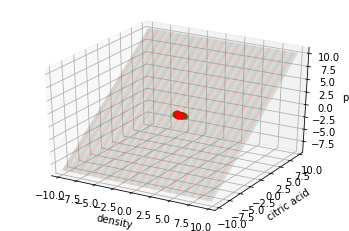

In [23]:
fig = plot_3d(performance, norm_data, 7, 4)

b) You know what the decision boundary for 2 wine chemical factors looks like, but what
does the decision boundary for 3 factors look like? What about if you use 7 factors?
How about if you use all 11 wine chemical factors?

Desicion boundary for 3 factors look like a plane, for 4 factors it look like a space.
But if we take more then 4 factors desicion boundary will look like hyperplane.
Space with more then 3 axes.
## Imagine it (badUUUm in your brain) but you may try.

## V.6 Marvin’s rebuttal

a) While not a wine. . . find a way to successfully classify the Pan-Galactic Gargle Blaster
dataset. Show that your perceptron or ADALINE successfully classifies the PanGalactic
Gargle Blaster data set by plotting the decision boundary and also show
‘good’ and ‘bad’ Gargle Blaster data points.

In [52]:
pan_galactic_path = "./resources/Pan Galactic Gargle Blaster.csv"
df2 = pd.read_csv(pan_galactic_path, sep=';')

In [59]:
def plot_galactic(norm_data):
    fig, axes = plt.subplots(1, 1)
    good_qual = norm_data[(norm_data['quality'] > 7)]
    bad_qual = norm_data[(norm_data['quality'] < 4)]
    good_dots = axes.plot(good_qual['wonderflonium'], good_qual['fallian marsh gas'], 'go')
    bad_dots = axes.plot(bad_qual['wonderflonium'], bad_qual['fallian marsh gas'], 'ro')
    axes.set_xlabel('wonderflonium')
    axes.set_ylabel('fallian marsh gas')
    axes.grid()

#### Lets visualize Pan-Galactic Gargle Blaster dataset

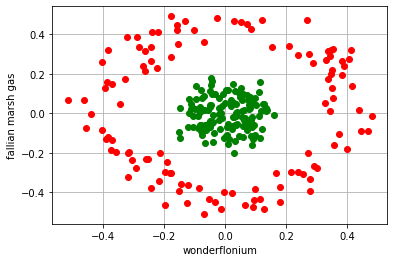

In [60]:
selected_data = df2[(df2['quality'] > 8) | (df2['quality'] < 2)][['wonderflonium', 'fallian marsh gas', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['wonderflonium'] = normalize_data(norm_data['wonderflonium'])
norm_data['fallian marsh gas'] = normalize_data(norm_data['fallian marsh gas'])

plot_galactic(norm_data)

#### Pan-Galactic Gargle Blaster dataset can be classified with ellipse

In [26]:
class AdalineEllipse(Adaline):
     def _train_epoch_online(self, X, y):
        errors_num = 0
        for xi, yi in zip(X.values, y.values):
            res = ft_dot([xi_j ** 2 for xi_j in xi], self.W) + self.bias
            if self._activ_func(res) != yi:
                errors_num += 1
                self.bias = self.bias + self.lr * (yi - self._activ_func(res))
                Wnew = []
                for xi_j, w in zip(xi, self.W):
                    wnew = w + self.lr * (yi - self._activ_func(res)) * (xi_j ** 2)
                    Wnew.append(wnew)
                self.W = Wnew
        return errors_num

In [27]:
X = norm_data[['wonderflonium', 'fallian marsh gas']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 2] = 0
y.loc[y['quality'] > 8] = 1
adaline = AdalineEllipse(lr=0.005)
performance = adaline.train(X, y, epoches=500)

In [28]:
def plot_performance_transform(performance, data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    if epoch > len(performance):
        raise Exception('too large epoch num passed')
    if epoch > 0:
        errors = [el[1] for el, feature in zip(performance, range(epoch))]
        epoches = [el[0] for el, feature in zip(performance, range(epoch))]
    else:
        errors = [el[1] for el in performance]
        epoches = [el[0] for el in performance]
    axes[0].plot(epoches, errors)
    if epoch > 0:
        W = performance[epoch][2]
        bias = performance[epoch][3]
    else:
        W = performance[-1][2]
        bias = performance[-1][3]
    w = -(W[0] / W[1])
    b = -bias/W[1]
    x = [x for x in np.arange(-15, 15, .01)]
    y = [(w * xi + b) for xi in x]
    axes[1].plot(x, y, 'b--', linewidth='1', label='Decision boundary')
    axes[1].set_xlabel('x1^2')
    axes[1].set_ylabel('x2^2')
    if epoch > 0:
        epoch_last = epoch
    else:
        epoch_last = performance[-1][0]
    axes[1].set_title('Decision boundary on epoch: ' + str(epoch_last))
    good_x, good_y, bad_x, bad_y = [], [], [], []
    for line in data.values:
        if line[-1] >= good_thresh or line[-1] <= bad_thresh:
            if line[-1] >= good_thresh:
                good_x.append(line[0])
                good_y.append(line[1])
            if line[-1] <= bad_thresh:
                bad_x.append(line[0])
                bad_y.append(line[1])
    sqr = lambda x: x ** 2
    good_x = list(map(sqr, good_x))
    good_y = list(map(sqr, good_y))
    bad_x = list(map(sqr, bad_x))
    bad_y = list(map(sqr, bad_y))
    dots1 = axes[1].plot(good_x, good_y, 'go', label='good wines(>=' + str(good_thresh) + ' score)')
    dots2 = axes[1].plot(bad_x, bad_y, 'ro', label='bad wines(<=' + str(bad_thresh) + ' score)')
    good_x.extend(bad_x)
    good_y.extend(bad_y)
    min_x_axes = min(good_x) - 0.01
    max_x_axes = max(good_x) + 0.01
    min_y_axes = min(good_y) - 0.01
    max_y_axes = max(good_y) + 0.01
    axes[1].set_xlim([min_x_axes, max_x_axes])
    axes[1].set_ylim([min_y_axes, max_y_axes])
    dots1[0].set_markersize(1.5)
    dots2[0].set_markersize(1.5)
    y_just_values = [yi[0] for yi in y]
    axes[1].fill_between(x, y_just_values, min_y_axes, color='#B8F4C0')
    axes[1].fill_between(x, y_just_values, max_y_axes, color='#D89797')
    box = axes[1].get_position()
    axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    if save_plot:
        fig.savefig("./decision_boundary.png")

I'll apply feature transform :
f(x1,x2) -> f(x1^2, x2^2)

<img src="/notebooks/img/feature_transform.png">

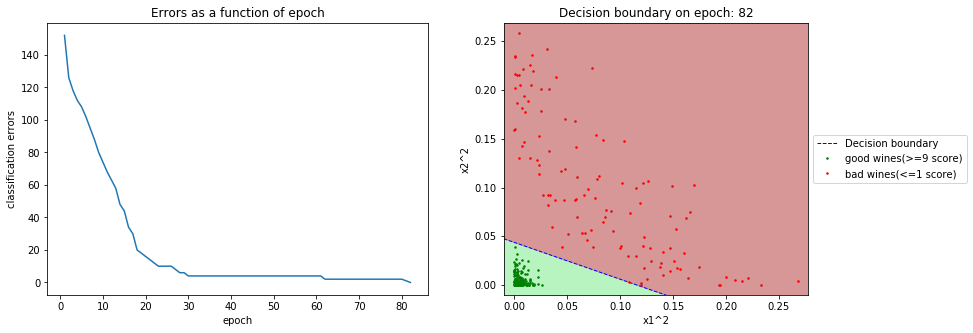

In [29]:
plot_performance_transform(performance, norm_data, 9, 1)

## VI.1 Gotta go fast!

Perceptron on cython

In [30]:
%load_ext Cython

In [31]:
%%cython
from libc.stdlib cimport malloc, free, rand, srand, RAND_MAX
from cpython cimport array
import array
import pandas as pd
data_path = "./resources/winequality-red.csv"

def normalize_data(column, mod='mean'):
    if mod == 'mean':
        return (column - column.mean()) / (column.max() - column.min())
    elif mod == 'minmax':
        return (column - column.min()) / (column.max() - column.min())
    else:
        raise ValueError('Doesnt correct mod type.')

cdef struct s_perceptron:
    float *weights;
    float bias;
    int n_weights;
ctypedef s_perceptron t_perceptron

cdef int heaviside(float arg):
    if arg >= 0:
        return 1
    else:
        return 0

cdef float ft_dot(xi, float *weights):
    cdef int x_len = len(xi)
    cdef float res = 0
    
    for i in range(x_len):
        res += xi[i] * weights[i]
    return res
    
cdef t_perceptron init_perc(X):
    cdef t_perceptron perc
    cdef int x_len = len(X[0])
    performance = []
    
    perc.n_weights = x_len
    perc.weights = <float*>malloc(sizeof(float) * x_len)
    for i in range(x_len):
        perc.weights[i] = rand()/RAND_MAX
    perc.bias = rand()/RAND_MAX
    return perc

cdef float cft_dot(t_perceptron perc, xi):
    cdef float res = 0
    cdef int i = 0
    for i in range(perc.n_weights):
        res += perc.weights[i] * xi[i]
    return(res)

cdef t_perceptron update_weights(t_perceptron perc, float lr, float res, xi, yi):
    for i in range(perc.n_weights):
        perc.weights[i] = perc.weights[i] + lr * (yi - heaviside(res)) * xi[i]
    return perc

cdef t_perceptron train_perc(t_perceptron perc, float lr, X, y):
    cdef int epoch_num = 0
    cdef int epoch_errors = 0
    cdef float res = 0
    
    while True:
        for xi, yi in zip(X, y):
            res = cft_dot(perc, xi) + perc.bias
            if heaviside(res) != yi:
                epoch_errors += 1
                perc.bias = perc.bias + lr * (yi - heaviside(res))
                perc = update_weights(perc, lr, res, xi, yi)
        if epoch_errors == 0:
            break
        epoch_errors = 0
        epoch_num += 1
    return perc

cdef perc_predict(t_perceptron perc, X):
    predicted_vals = []
    for xi in X:
        res = cft_dot(perc, xi) + perc.bias
        predicted_vals.append(heaviside(res))
    return predicted_vals

df = pd.read_csv(data_path, sep=';')
selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
X = list(X.values)
y = list(y.values)
cdef t_perceptron perc = init_perc(X)
perc = train_perc(perc, 0.005, X, y)
print('weights', perc.weights[0], perc.weights[1], 'bias',perc.bias)
predicted_vals = perc_predict(perc, X)
errors = 0
free(perc.weights)
for yi, yi_pred in zip(y, predicted_vals):
    if yi != yi_pred:
        errors += 1

def train_perceptron(X, y, lr):
    cdef t_perceptron perc = init_perc(X)
    perc = train_perc(perc, lr, X, y)
    free(perc.weights)



weights -0.29725316166877747 0.2396925389766693 bias 0.023502282798290253


In [32]:
%%timeit
train_perceptron(X, y, 0.005)

8.69 ms ± 605 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
pperc = Perceptron(lr=0.005) 

In [34]:
%%timeit
pperc.train(X, y)

22.3 ms ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Adaline on cython

In [35]:
%%cython
from libc.stdlib cimport malloc, free, rand, srand, RAND_MAX
from cpython cimport array
import array
from math import exp
import pandas as pd
data_path = "./resources/winequality-red.csv"

def normalize_data(column, mod='mean'):
    if mod == 'mean':
        return (column - column.mean()) / (column.max() - column.min())
    elif mod == 'minmax':
        return (column - column.min()) / (column.max() - column.min())
    else:
        raise ValueError('Doesnt correct mod type.')

cdef struct s_adaline:
    float *weights;
    float bias;
    int n_weights;
ctypedef s_adaline t_adaline

cdef int sigm(float arg):
    if 1 / (1 + exp(-arg)) >= 0.5:
        return 1
    else:
        return 0

cdef float ft_dot(xi, float *weights):
    cdef int x_len = len(xi)
    cdef float res = 0
    
    for i in range(x_len):
        res += xi[i] * weights[i]
    return res
    
cdef t_adaline init_adaline(X):
    cdef t_adaline adaline
    cdef int x_len = len(X[0])
    performance = []
    adaline.n_weights = x_len
    adaline.weights = <float*>malloc(sizeof(float) * x_len)
    for i in range(x_len):
        adaline.weights[i] = rand()/RAND_MAX
    adaline.bias = rand()/RAND_MAX
    return adaline

cdef float cft_dot(t_adaline adaline, xi):
    cdef float res = 0
    cdef int i = 0
    for i in range(adaline.n_weights):
        res += adaline.weights[i] * xi[i]
    return(res)

cdef t_adaline update_weights(t_adaline adaline, float lr, float res, xi, yi):
    for i in range(adaline.n_weights):
        adaline.weights[i] = adaline.weights[i] + lr * (yi - sigm(res)) * xi[i]
    return adaline

cdef t_adaline train_adaline(t_adaline adaline, float lr, X, y):
    cdef int epoch_num = 0
    cdef int epoch_errors = 0
    cdef float res = 0
    while True:
        for xi, yi in zip(X, y):
            res = cft_dot(adaline, xi) + adaline.bias
            if sigm(res) != yi:
                epoch_errors += 1
                adaline.bias = adaline.bias + lr * (yi - sigm(res))
                adaline = update_weights(adaline, lr, res, xi, yi)
        if epoch_errors == 0:
            break
        epoch_errors = 0
        epoch_num += 1
    return adaline

cdef adaline_predict(t_adaline adaline, X):
    predicted_vals = []
    for xi in X:
        res = cft_dot(adaline, xi) + adaline.bias
        predicted_vals.append(sigm(res))
    return predicted_vals

df = pd.read_csv(data_path, sep=';')
selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
X = list(X.values)
y = list(y.values)
cdef t_adaline adaline = init_adaline(X)
adaline = train_adaline(adaline, 0.005, X, y)
print('weights', adaline.weights[0], adaline.weights[1], 'bias', adaline.bias)
predicted_vals = adaline_predict(adaline, X)
errors = 0
free(adaline.weights)
for yi, yi_pred in zip(y, predicted_vals):
    if yi != yi_pred:
        errors += 1

def train_adaline_test(X, y, lr):
    cdef t_adaline adaline = init_adaline(X)
    adaline = train_adaline(adaline, lr, X, y)
    free(adaline.weights)

weights -0.4075126349925995 0.332999587059021 bias 0.02770359441637993


In [36]:
%%timeit
train_adaline_test(X, y, 0.005)

9.95 ms ± 446 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## VI.2 Do perceptrons dream of electric sheep?

Create animated plots of errors as a function of epoch and the changing decision boundary
of your perceptron and/or ADALINE as a function of epoch. Each time step in your
animation should be equivalent to advancing the training epoch by 1!

In [37]:
%%capture
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
# create figure by yourself

selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X_norm = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
perc = Perceptron(lr=0.005)
performance = perc.train(X_norm, y, epoches=-1)

fig, axes = plt.subplots(1, 2, figsize=(15, 10));
fig.subplots_adjust(hspace=0, wspace=0)

good_qual = norm_data[(norm_data['quality'] > 7)]
bad_qual = norm_data[(norm_data['quality'] < 4)]

# axes[1].set_xlim([0.98, 1.01])
# axes[1].set_ylim([0, 0.8])

good_dots = axes[1].plot(good_qual['density'], good_qual['citric acid'], 'go')
bad_dots = axes[1].plot(bad_qual['density'], bad_qual['citric acid'], 'ro')



line1 = axes[0].plot([],[], lw=2)[0];
line2 = axes[1].plot([],[], lw=2)[0];


def init():
    axes[0].set_xlim(0, max([el[0] for el in performance]) + 10)
    axes[0].set_ylim(0, max([el[1] for el in performance]) + 10)
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('errors')
    line1.set_data([], [])
    axes[1].set_xlabel('density')
    axes[1].set_ylabel('citr acid')
#     axes[1].set_xlim(-1, 1)
#     axes[1].set_ylim(-1, 1)
    
def animate(i):
    errors = [el[1] for el in performance[:i]]
    epoches = [el[0] for el in performance[:i]]
    line1.set_data(epoches[:i], errors[:i])
    W = performance[i][2]
    bias = performance[i][3]
    w = -(W[0] / W[1])
    b = -bias / W[1]
    x = [x for x in np.arange(-15, 15, .01)]
    y = [(w * xi + b) for xi in x]
    line2.set_data(x, y)
    return line1, line2

ani = animation.FuncAnimation(fig, animate, interval=80, init_func=init, frames=len(performance))

In [38]:
print(performance[-1])
print(len(performance))

(101, 0, [array([-0.4931404]), array([0.40649114])], array([0.03558409]))
101


In [39]:
HTML(ani.to_jshtml(fps=24))